# Predator Analysis: GBM

## Evaluation on _CGC_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Predator\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_GBM_CGC.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">June 17th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display
from PredatorAnalysis import PredatorAnalysis

# Paths
## SNVs
SNV_COMMON_PATH = "C:/Users/ibrah/Desktop/SNV_data/SNV_datasets/"
SNV_GBM_PATH = SNV_COMMON_PATH + "SNV_GBM_hg38_2021-09-22.csv"

PREDICTION_ID = "8d7f7caa/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/gbm_prediction_2022-06-17/" + PREDICTION_ID
PREDICTION_GBM_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2022-06-17.csv"

ELASPIC_RESULTS_COMMON_PATH = "../data/Elaspic_merged_results/"  # elaspic_results_datasets
GBM_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "GBM_Core_2021-11-17.txt"
GBM_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "GBM_Interface_2021-11-17.txt"

# Patient Interaction data
GBM_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/GBM_patient_interactions_analysis_table_2022-06-17.xlsx"

# CGC GENES
CGC_ALL_PATH = "../data/cgc_genes/all_cgc_synonyms_genes_2021-11-06.txt"
CGC_BRAIN_PATH = "../data/cgc_genes/glioblastoma_synonyms_genes_2021-11-17.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
predator_analysis = PredatorAnalysis(
    tcga="gbm",
    snv_path=SNV_GBM_PATH,
    prediction_data_path=PREDICTION_GBM_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=GBM_CORE_PATH,
    elaspic_interface_path=GBM_INTERFACE_PATH,
    patient_interaction_data_path=GBM_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cgc",
    reference_data_spec_cohort_path=CGC_BRAIN_PATH,
    reference_data_path=CGC_ALL_PATH
)

2022-06-17 14:33:29 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2022-06-17 14:33:29 | INFO     | PredatorAnalysis | TCGA: gbm
2022-06-17 14:33:29 | INFO     | PredatorAnalysis | PREDICTION ID: 8d7f7caa/
2022-06-17 14:33:29 | INFO     | helpers.helpers_analysis.loaders | Loading gbm SNV datasets ..
2022-06-17 14:33:35 | DEBUG    | helpers.helpers_analysis.loaders | gbm SNV data size: (82765, 121)
2022-06-17 14:33:36 | DEBUG    | helpers.helpers_analysis.loaders | gbm SNV data processed size: (46847, 121)
2022-06-17 14:33:36 | INFO     | helpers.helpers_analysis.loaders | gbm SNV datasets are loaded.
2022-06-17 14:33:36 | INFO     | helpers.helpers_analysis.loaders | Loading gbm Prediction dataset ..
2022-06-17 14:33:36 | DEBUG    | helpers.helpers_analysis.loaders | gbm Prediction data shape: (2934, 5)
2022-06-17 14:33:36 | INFO     | helpers.helpers_analysis.loaders | gbm Prediction dataset is loaded.
2022-06-17 14:33:36 | INFO     | helpers.helpers_analysis.loaders | L

# Datasets

##  1. SNV Datasets

In [3]:
# Original SNV Dataset
print(predator_analysis.data_materials["gbm_snv_data"].shape)

(82765, 121)


In [4]:
# Processed SNV Dataset
print(predator_analysis.data_materials["gbm_snv_data_processed"].shape)

(46847, 121)


In [5]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["gbm_snv_data_simplified"].shape)
predator_analysis.data_materials["gbm_snv_data_simplified"].head(3)

(46847, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0      EIF4G3    O43432       Q246E         TCGA-06-5413
1      SH2D1B    O14796        H96R         TCGA-06-5413
2        RYR2    Q92736      T4063M         TCGA-06-5413

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [6]:
# Core data 
print(predator_analysis.data_materials["gbm_elaspic_core_data"].shape)
predator_analysis.data_materials["gbm_elaspic_core_data"].head(3)

(16162, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           O14796     O14796     H96R   done  core   COSM2153184   
1           Q8WZ42     Q8WZ42   A1081V   done  core   COSM1664832   
2           P42336     P42336     E39K   done  core     COSM30625   

  ClinVar_mut_ID UniProt_mut_ID         Domain_name         Domain_clan  ...  \
0              -              -                 SH2                 SH2  ...   
1              -              -               I-set               I-set  ...   
2              -              -  PI3K_p85B+PI3K_rbd  PI3K_p85B+PI3K_rbd  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  103.0                      -                        -   
1                  107.0                      -                        -   
2                  289.0                      -                        -   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                       -                          -   
1                       -                       -                          -   
2                       -                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [7]:
# Core data simplified
print(predator_analysis.data_materials["gbm_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["gbm_elaspic_core_data_simplified"].head(3)

(16160, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     O14796     H96R                     -
1     Q8WZ42   A1081V                     -
2     P42336     E39K                     -

### 2.2 `Interface` Datasets

In [8]:
print(predator_analysis.data_materials["gbm_elaspic_interface_data"].shape)
predator_analysis.data_materials["gbm_elaspic_interface_data"].head(3)  ## <-- i was here

(5624, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           P46734     P46734    K200E   done  interface             -   
1           P46734     P46734    K200E   done  interface             -   
2           P46734     P46734    K200E   done  interface             -   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -     Pkinase     Pkinase  ...   
1              -              -     Pkinase     Pkinase  ...   
2              -              -     Pkinase     Pkinase  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  640.0               140.8630                 140.8620   
1                  596.0                88.7587                  88.7927   
2                  622.0               252.2520                 252.2990   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 115.263                 115.263                     522.24   
1                 264.825                 264.825                       None   
2                 112.394                 112.522                       None   

  Interface_hydrophilic_area Interface_total_area  \
0                    286.075              808.315   
1                       None                 None   
2                       None                 None   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                       2.74325                         2.74325  
1                       3.68021                         3.59315  
2                       2.95347                         2.95347  

[3 rows x 103 columns]

In [9]:
print(predator_analysis.data_materials["gbm_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["gbm_elaspic_interface_processed_data"].head(3)

(3032, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P46734    K200E                P27361
1     P46734    K200E                Q16512
2     P46734    K200E                Q5S007

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *gbm_elaspic_core_data_simplified*
+ *gbm_interface_processed*

In [10]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["gbm_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["gbm_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["gbm_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["gbm_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     O14796     H96R                     -
1     Q8WZ42   A1081V                     -
2     P42336     E39K                     -

Data dimensions: (16160, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P46734    K200E                P27361
1     P46734    K200E                Q16512
2     P46734    K200E                Q5S007

Data dimensions: (3032, 3)


In [11]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["gbm_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["gbm_elaspic_core_and_interface_data"].head(3)

(19192, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     O14796     H96R                     -
1     Q8WZ42   A1081V                     -
2     P42336     E39K                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [12]:
print(predator_analysis.data_materials["gbm_prediction_data"].shape)
predator_analysis.data_materials["gbm_prediction_data"].head(3)

(2934, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     P46734    K200E                P27361           0             0.18565
1     P46734    K200E                Q16512           0             0.08214
2     P46734    K200E                Q5S007           0             0.13307

## 4. CGC Genes

In [13]:
print(len(predator_analysis.data_materials['cgc_gbm_genes']))
predator_analysis.data_materials['cgc_gbm_genes'][:5]  # Including synonyms

403


['ENSG00000215301.10', '51684', 'IDH1', 'P25054', 'ENSG00000174469.20']

In [14]:
print(len(predator_analysis.data_materials['cgc_all_genes']))
predator_analysis.data_materials['cgc_all_genes'][:5]  # Including synonyms

4878


['8522', 'KMT3G', 'P27635', 'ENSG00000122779.17', 'Q93074']

# Prepare Analysis

In [15]:
predator_analysis.prepare_analysis()

2022-06-17 14:34:00 | DEBUG    | PredatorAnalysis | gbm_elaspic_proteins loaded.
2022-06-17 14:34:00 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC gbm: 7494


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/7494 [00:00<?, ?it/s]

2022-06-17 14:34:02 | DEBUG    | PredatorAnalysis | gbm_protein_to_gene_dict loaded.


  0%|          | 0/7494 [00:00<?, ?it/s]

0 	 A0AV96 	 2
1 	 A0AVF1 	 0
2 	 A0AVK6 	 0
3 	 A0AVT1 	 0
4 	 A0FGR9 	 2
2022-06-17 14:34:13 | DEBUG    | PredatorAnalysis | gbm_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/7494 [00:00<?, ?it/s]

0 	 A0AV96 	 1
1 	 A0AVF1 	 0
2 	 A0AVK6 	 0
3 	 A0AVT1 	 0
4 	 A0FGR9 	 2
2022-06-17 14:34:22 | DEBUG    | PredatorAnalysis | gbm_protein_to_num_unique_interactors loaded.
2022-06-17 14:34:22 | DEBUG    | PredatorAnalysis | Number of patients in gbm: 392.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [16]:
print('Number of proteins in ELASPIC GBM:', len(predator_analysis.data_materials["gbm_elaspic_proteins"]))

Number of proteins in ELASPIC GBM: 7494


## 2. Genes

In [17]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["gbm_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVF1', 'TTC26'),
 ('A0AVK6', 'E2F8'),
 ('A0AVT1', 'UBA6'),
 ('A0FGR9', 'ESYT3')]

## 3. ELASPIC Number of Interface Entries

In [18]:
list(predator_analysis.data_materials["gbm_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 2), ('A0AVF1', 0), ('A0AVK6', 0), ('A0AVT1', 0), ('A0FGR9', 2)]

In [19]:
# TP53
predator_analysis.data_materials["gbm_protein_to_num_elaspic_interface_entries"]["P04637"]  # 126

126

## 4. ELASPIC Number of Unique Interactors

In [20]:
list(predator_analysis.data_materials["gbm_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 1), ('A0AVF1', 0), ('A0AVK6', 0), ('A0AVT1', 0), ('A0FGR9', 2)]

In [21]:
# TP53
predator_analysis.data_materials["gbm_protein_to_num_unique_interactors"]["P04637"]  # 19

19

## 5. Patients

In [22]:
print(f'Number of patients {len(predator_analysis.data_materials["gbm_patients"])}.')  # 392.

Number of patients 392.


# Analysis Table Construction

In [23]:
predator_analysis.construct_analysis_table()

2022-06-17 14:34:53 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2022-06-17 14:34:53 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2022-06-17 14:34:53 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2022-06-17 14:34:53 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2022-06-17 14:35:07 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2022-06-17 14:35:16 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2022-06-17 14:35:16 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/392 [00:00<?, ?it/s]

2022-06-17 14:42:23 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/392 [00:00<?, ?it/s]

2022-06-17 14:50:02 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2022-06-17 14:50:26 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/392 [00:00<?, ?it/s]

2022-06-17 15:00:30 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2022-06-17 15:00:30 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/392 [00:00<?, ?it/s]

2022-06-17 15:07:39 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2022-06-17 15:07:40 | DEBUG    | PredatorAnalysis | gbm_preliminary_data is constructed.


In [24]:
predator_analysis.data_materials["gbm_preliminary_data"]

PROTEIN      GENE  NUM_ELASPIC_INTERFACE_ENTRIES  NUM_DISRUPTIVE_ENTRIES  \
0     A0AV96     RBM47                              2                       2   
1     A0AVF1     TTC26                              0                       0   
2     A0AVK6      E2F8                              0                       0   
3     A0AVT1      UBA6                              0                       0   
4     A0FGR9     ESYT3                              2                       0   
...      ...       ...                            ...                     ...   
7489  Q9Y6X8      ZHX2                              0                       0   
7490  Q9Y6X9     MORC2                              0                       0   
7491  Q9Y6Y0  IVNS1ABP                              0                       0   
7492  Q9Y6Y9      LY96                              0                       0   
7493  Q9Y6Z7   COLEC10                              0                       0   

      NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  PATIENT_CORE_COUNT  \
0                          0                       1                   6   
1                          0                       0                   1   
2                          0                       0                   1   
3                          0                       0                   1   
4                          1                       2                   0   
...                      ...                     ...                 ...   
7489                       0                       0                   2   
7490                       0                       0                   1   
7491                       0                       0                   1   
7492                       0                       0                   2   
7493                       0                       0                   1   

      PATIENT_INTERFACE_COUNT  NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  \
0                           2                                             2   
1                           0                                             0   
2                           0                                             0   
3                           0                                             0   
4                           1                                             0   
...                       ...                                           ...   
7489                        0                                             0   
7490                        0                                             0   
7491                        0                                             0   
7492                        0                                             0   
7493                        0                                             0   

      BASELINE  OUR_METHOD  OUR_METHOD/BASELINE  ELASPIC_COVERAGE CGC_STATUS  \
0            2           2                  1.0                 8          -   
1            0           0                  NaN                 1          -   
2            0           0                  NaN                 1          -   
3            0           0                  NaN                 1          -   
4            1           0                  0.0                 1          -   
...        ...         ...                  ...               ...        ...   
7489         0           0                  NaN                 2          -   
7490         0           0                  NaN                 1          -   
7491         0           0                  NaN                 1          -   
7492         0           0                  NaN                 2          -   
7493         0           0                  NaN                 1          -   

     CGC_STATUS (GBM)  
0                   -  
1                   -  
2                   -  
3                   -  
4                   -  
...               ...  
7489                -  
7490             

# ROC Curve Analysis

2022-06-17 15:58:37 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


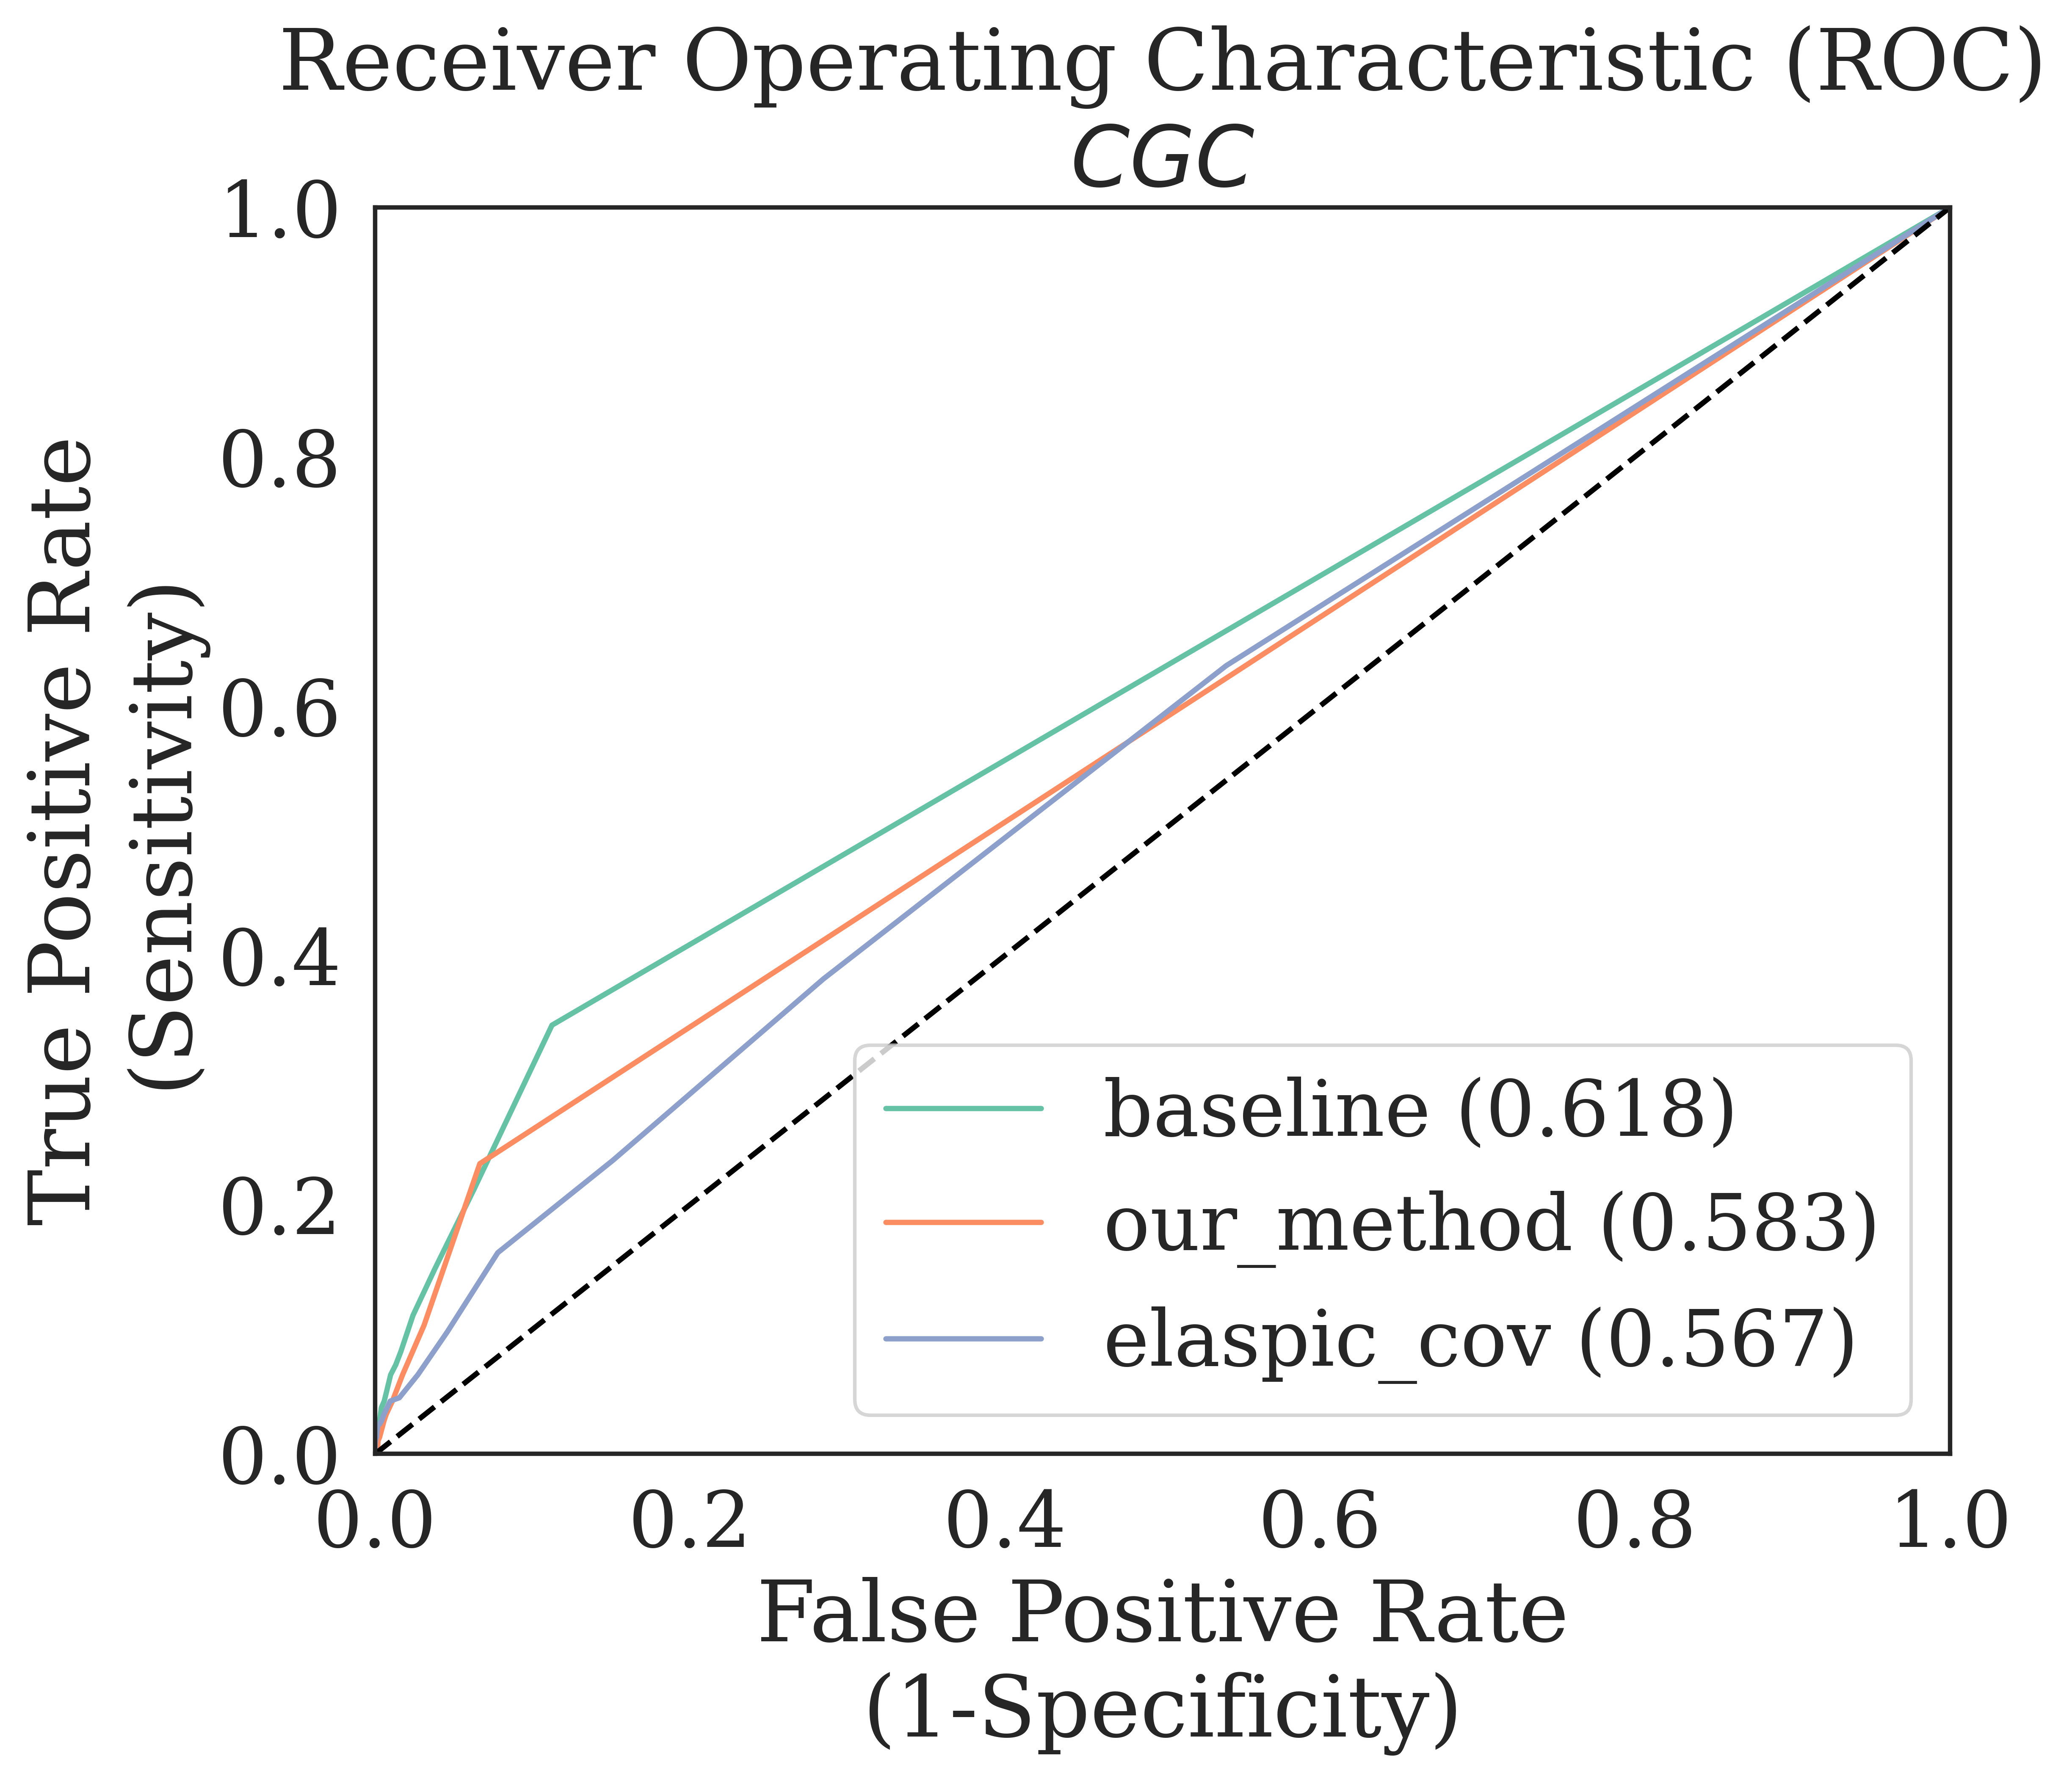

2022-06-17 15:58:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.618
2022-06-17 15:58:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.583
2022-06-17 15:58:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.567


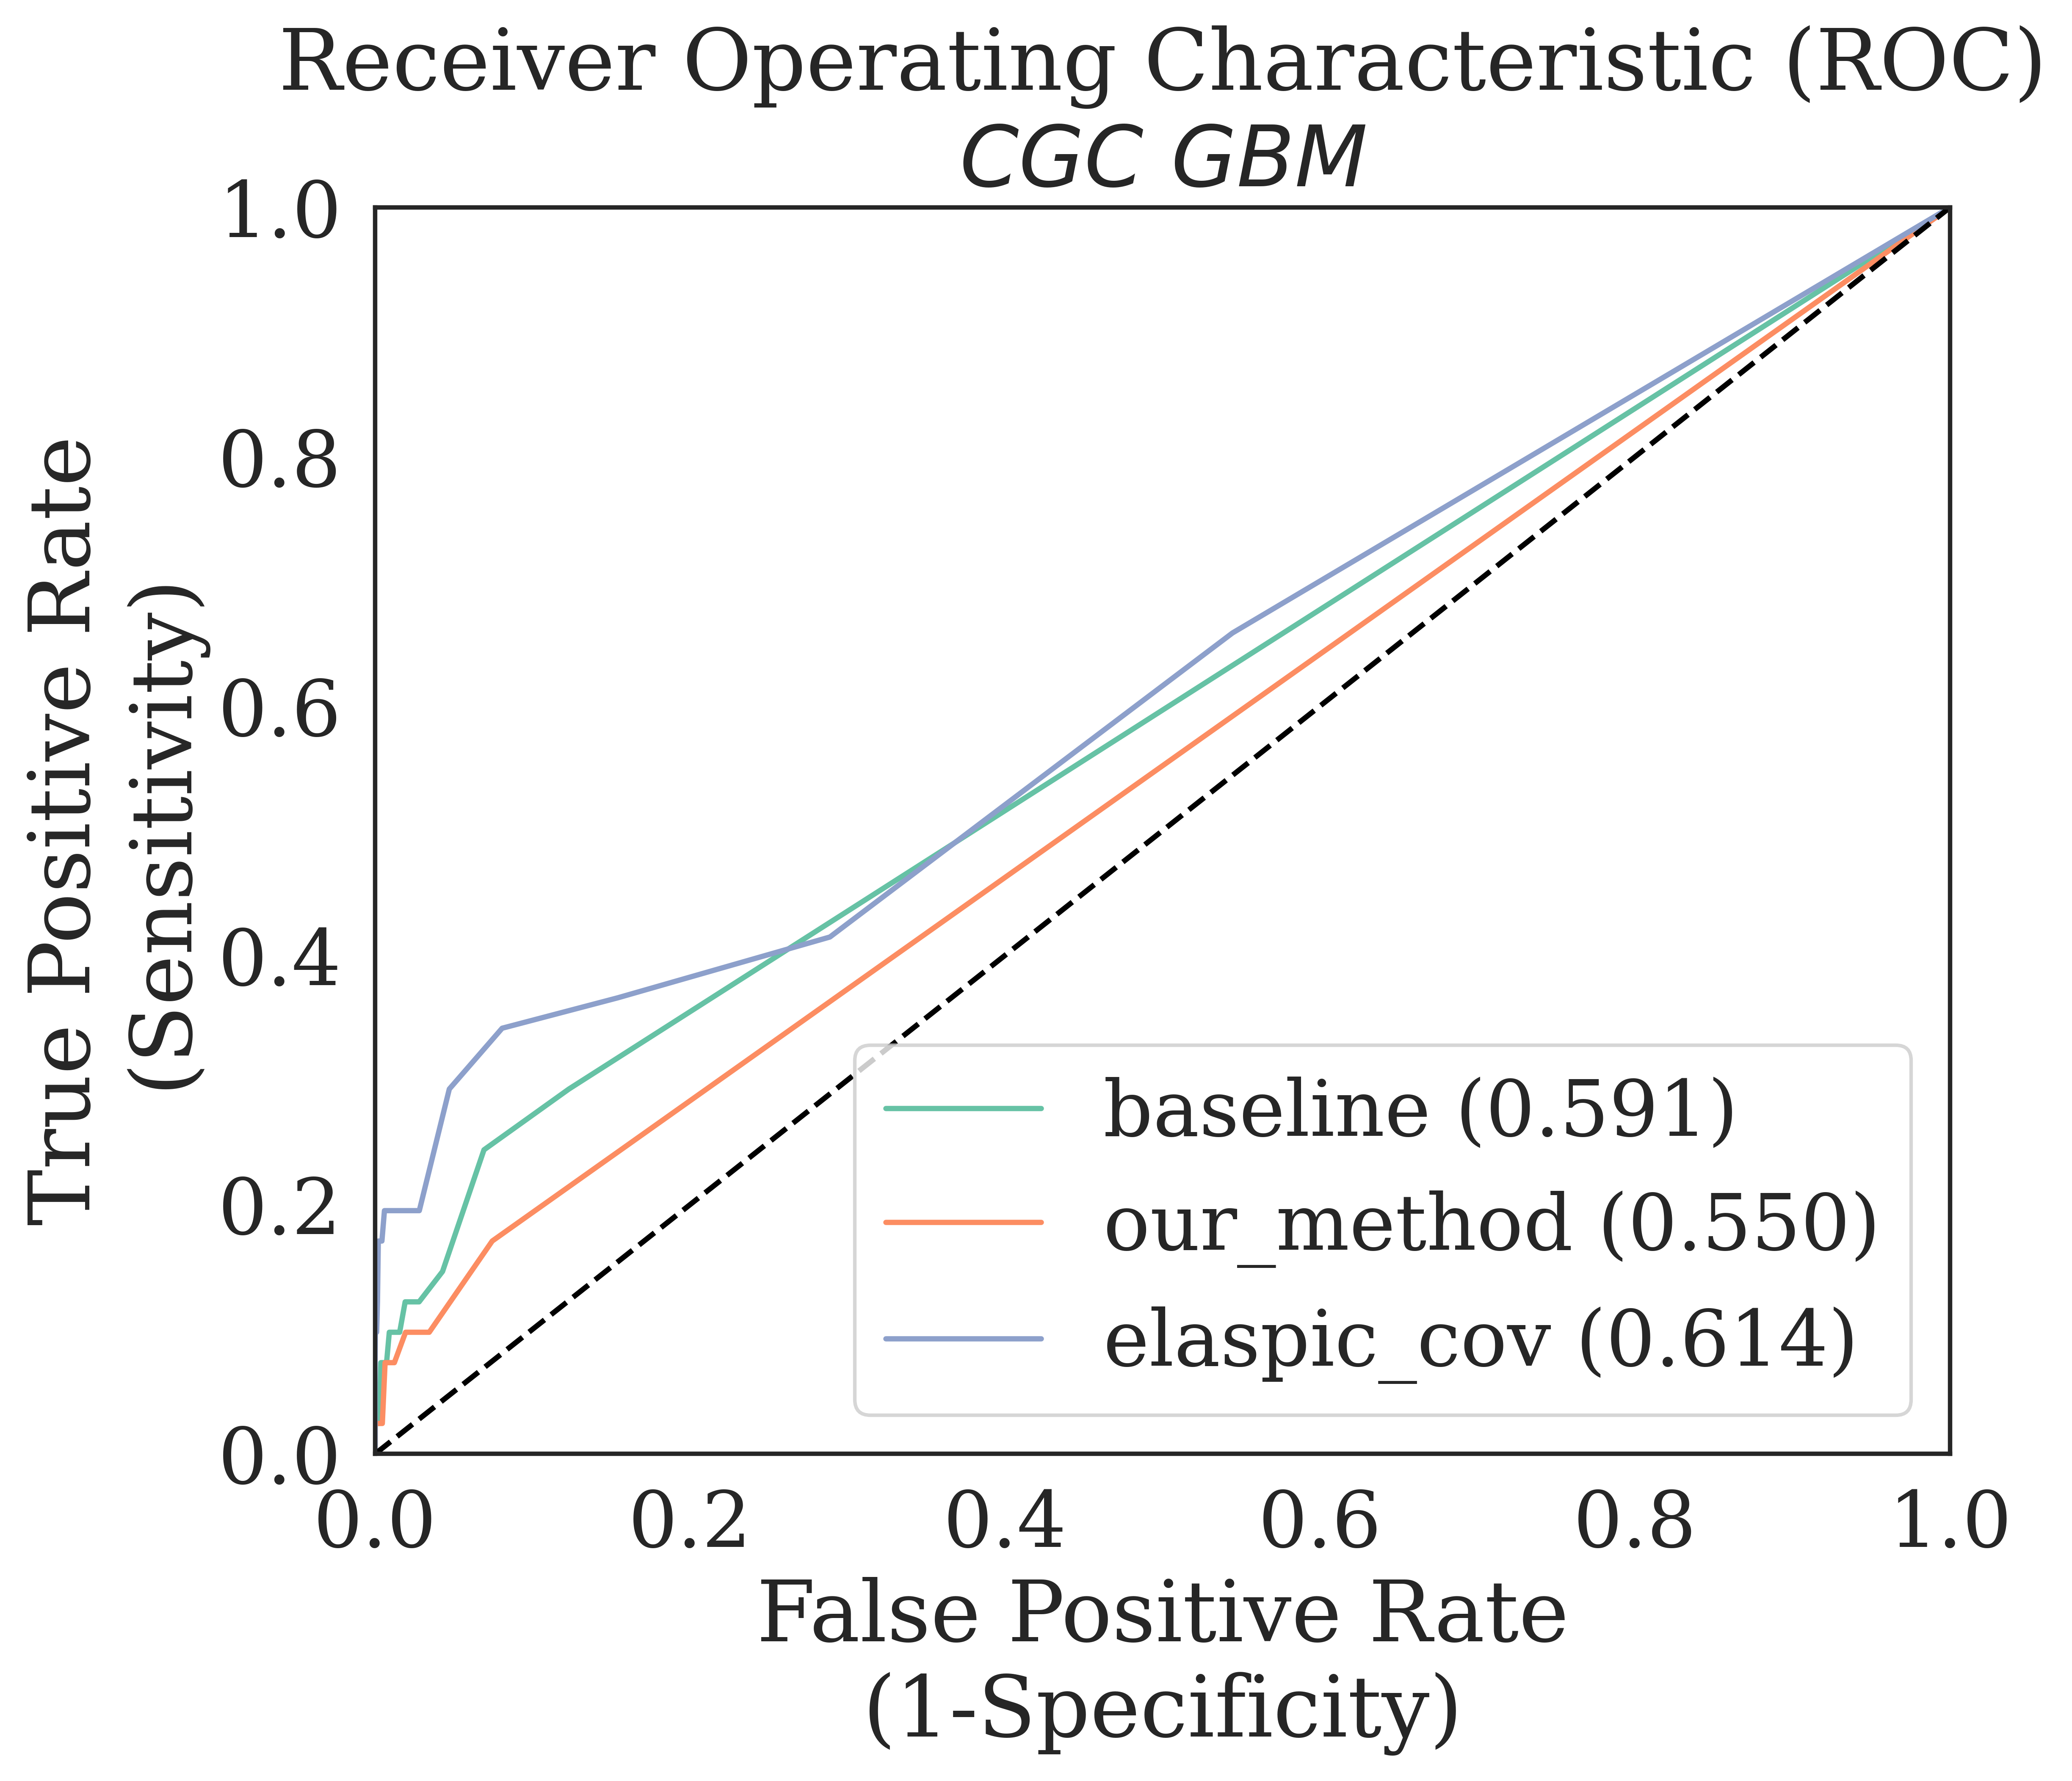

2022-06-17 15:58:43 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.591
2022-06-17 15:58:43 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.550
2022-06-17 15:58:43 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.614


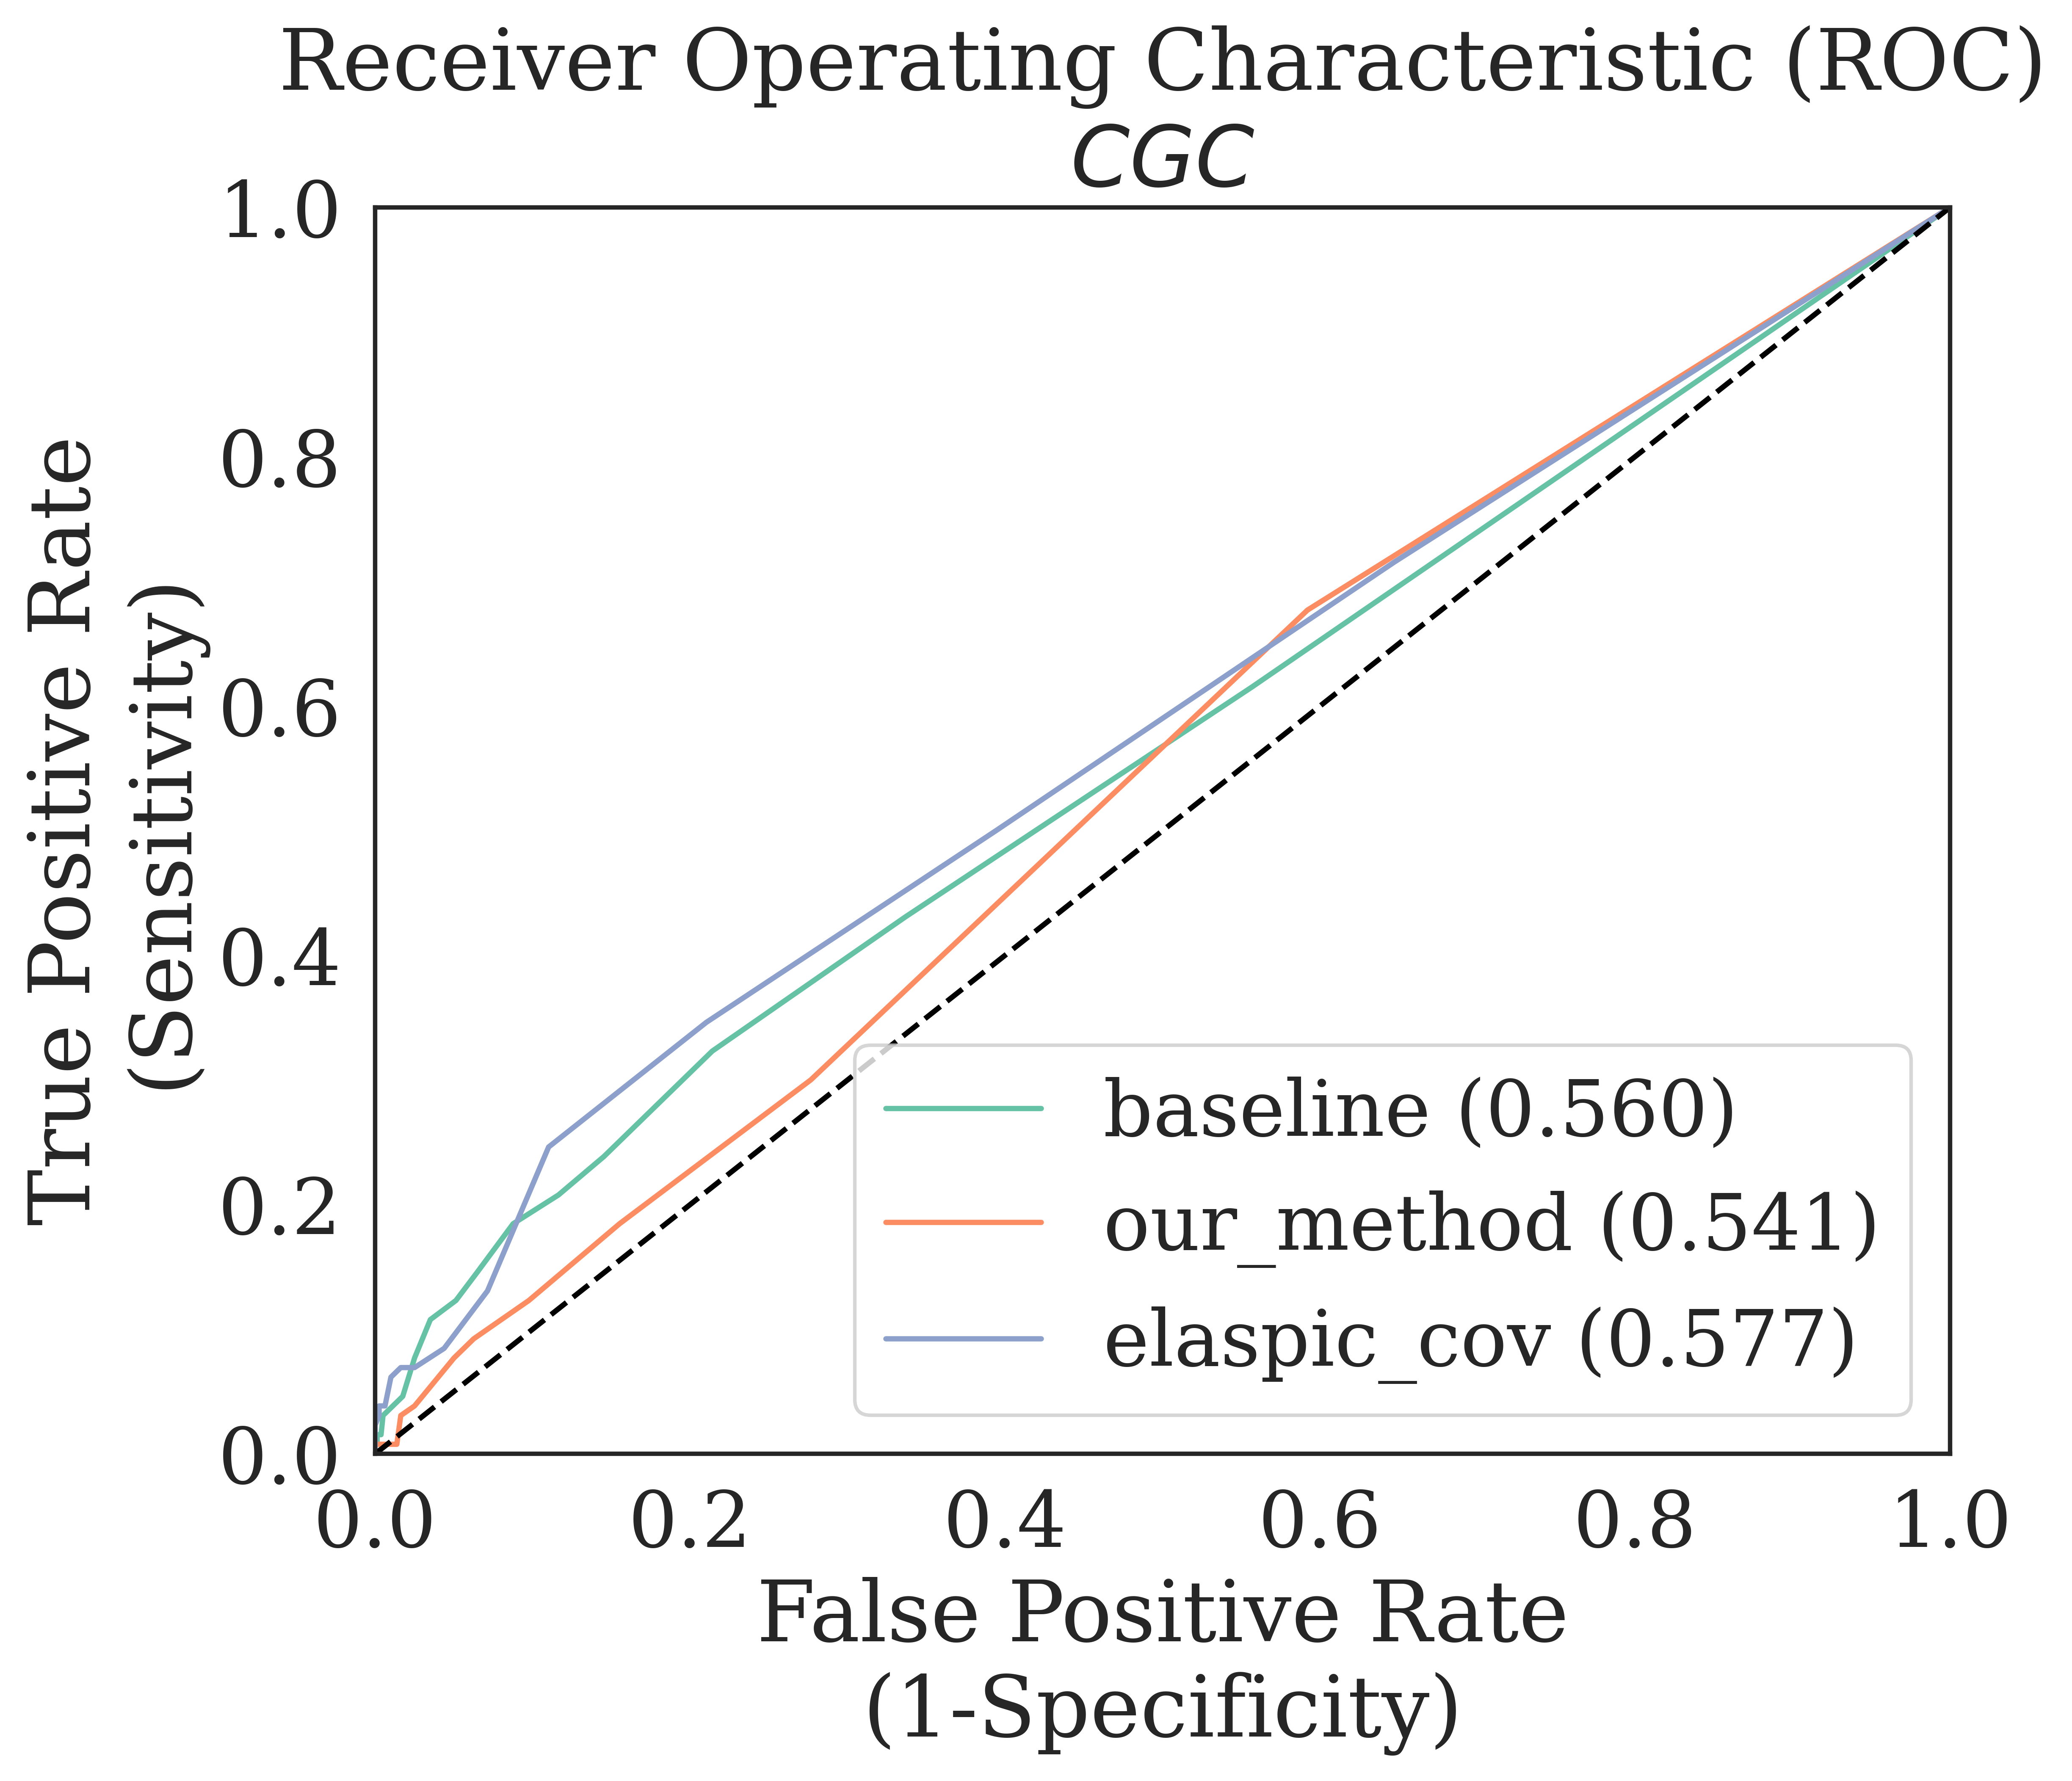

2022-06-17 15:58:45 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.560
2022-06-17 15:58:45 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.541
2022-06-17 15:58:45 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.577


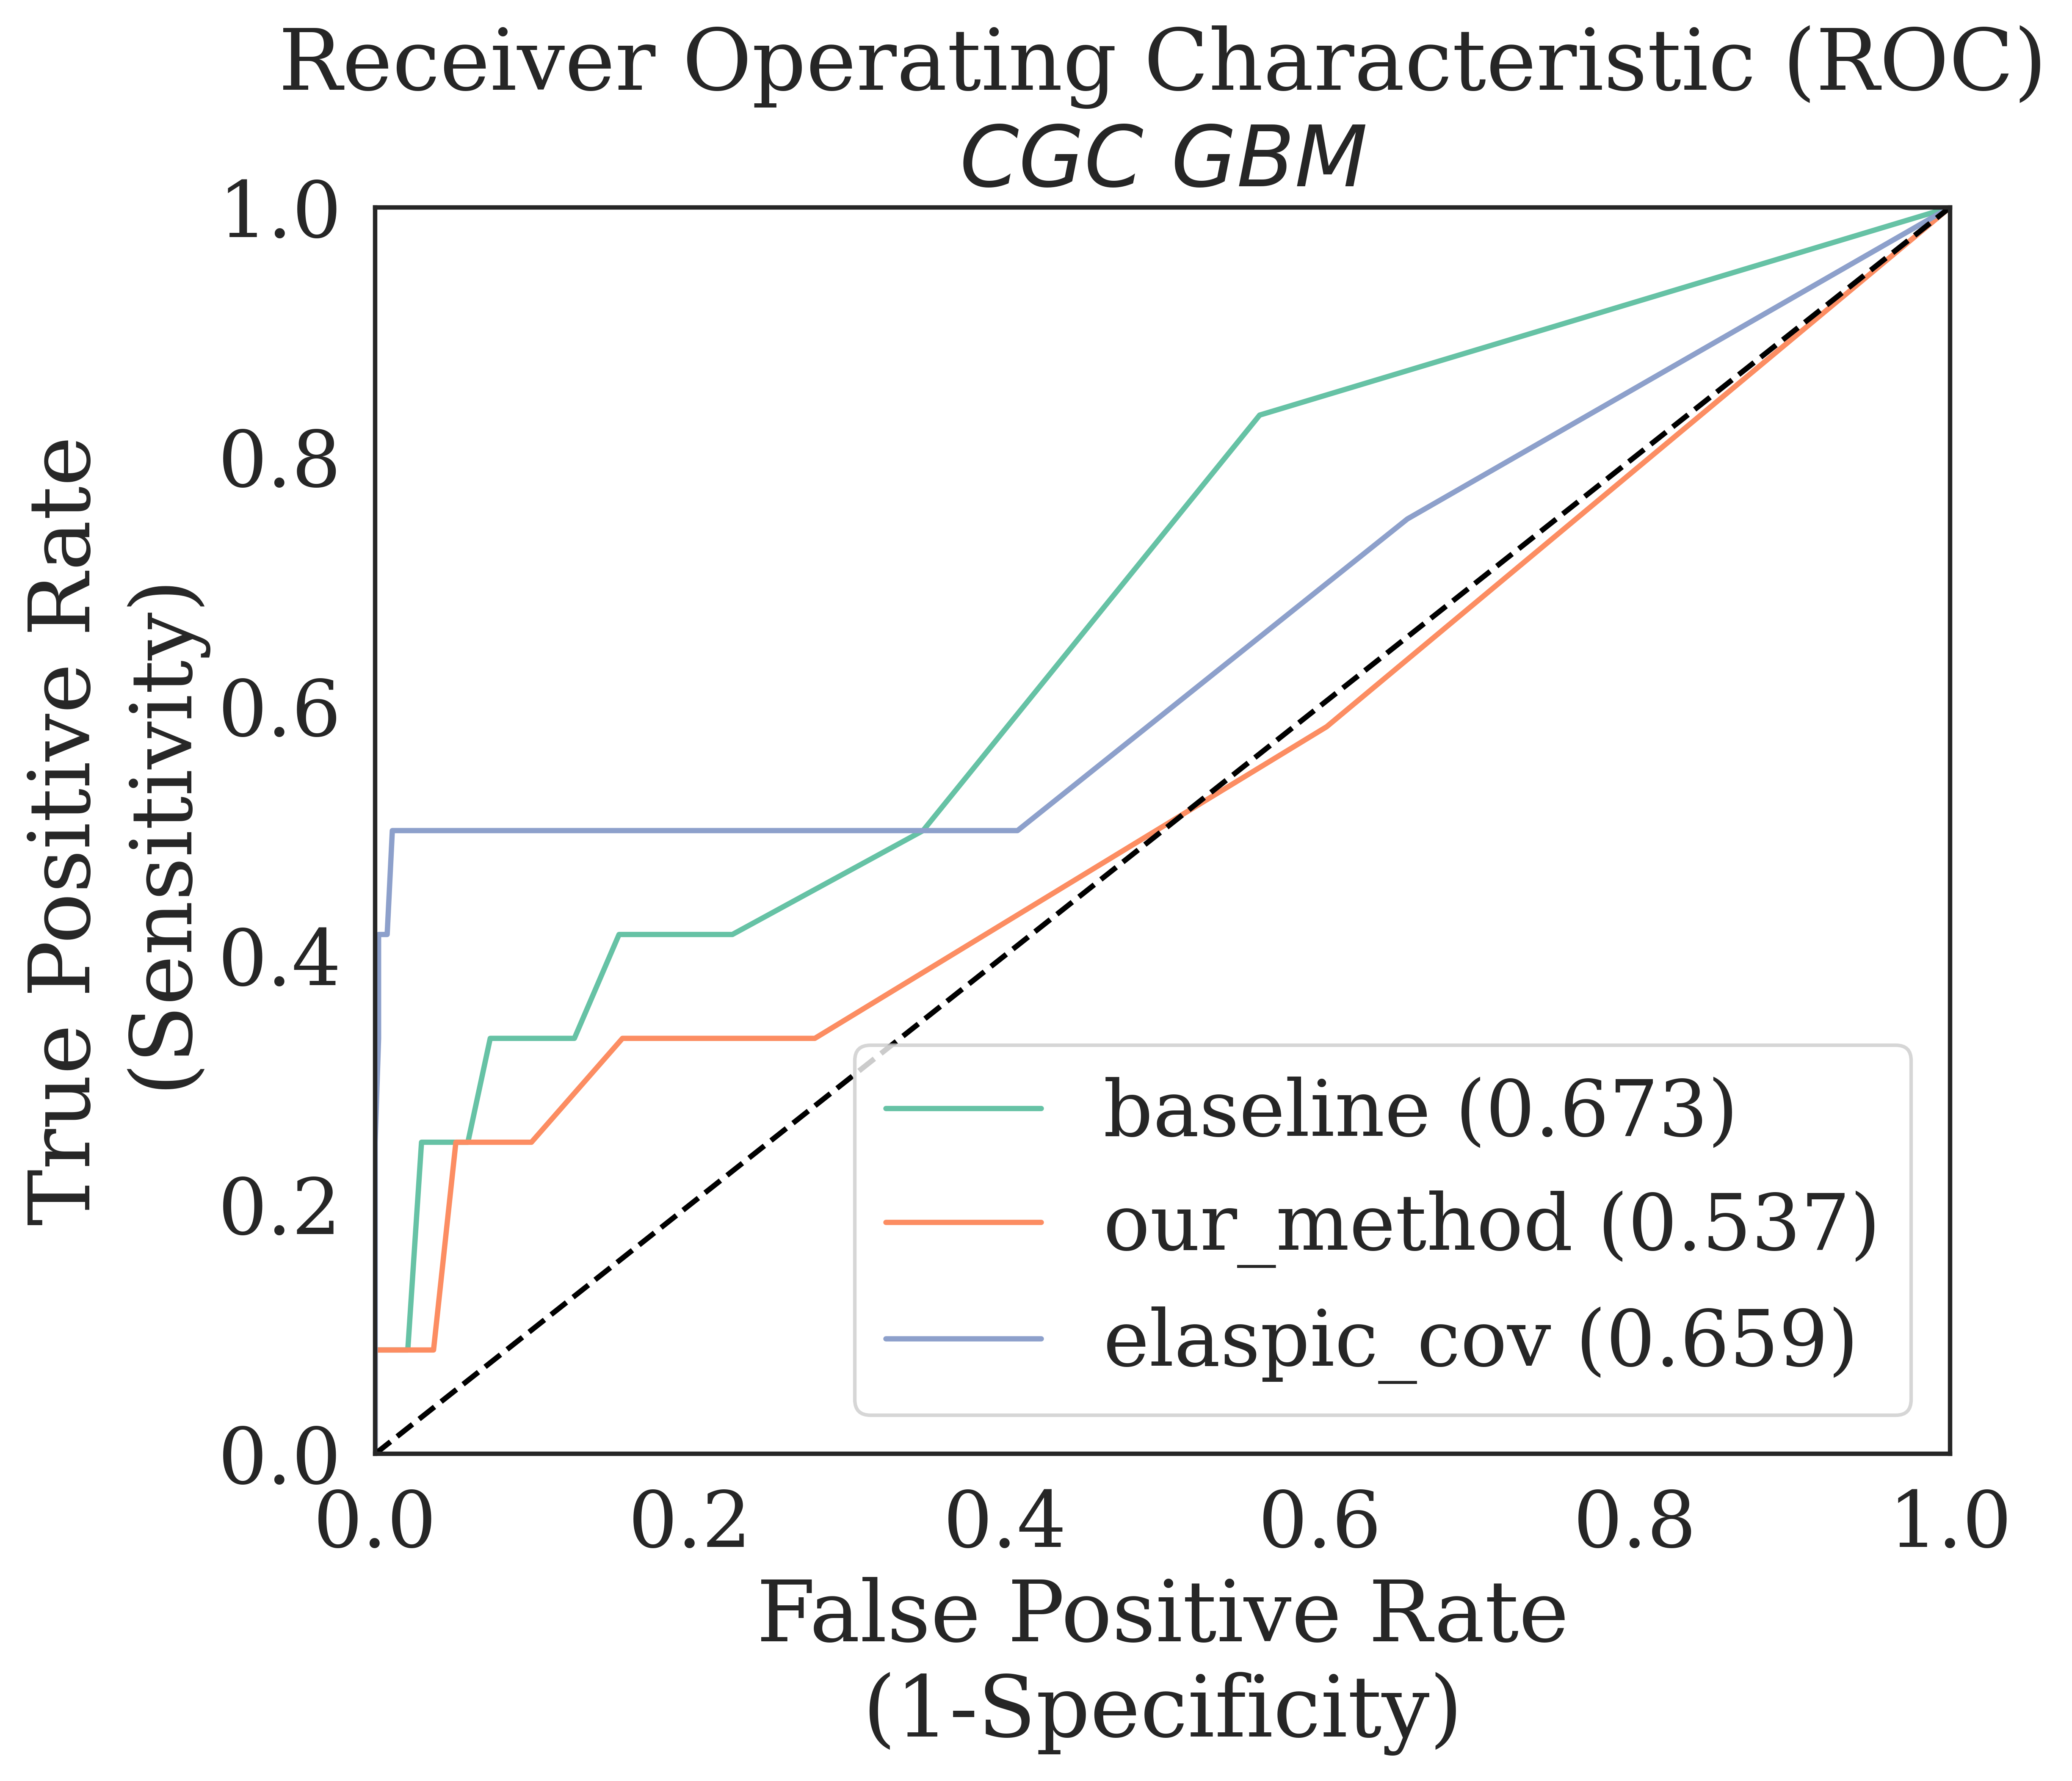

2022-06-17 15:58:48 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.673
2022-06-17 15:58:48 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.537
2022-06-17 15:58:48 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.659


In [25]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="gbm_preliminary_data",
    state_variables=["CGC_STATUS", "CGC_STATUS (GBM)"]
)

In [26]:
predator_analysis.export_auc_scores("auc_scores_cgc", overwrite=False)

default default_gbm baseline_nonzero baseline_nonzero_gbm
Method                                                               
BASELINE      0.618       0.591            0.560                0.673
OURS          0.583       0.550            0.541                0.537
ELASPIC_COV   0.567       0.614            0.577                0.659

2022-06-17 15:59:05 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\gbm_prediction_2022-06-17\8d7f7caa\auc_scores_cgc_2022-06-17.csv


# Save to Excel file

In [27]:
from helpers.helpers_analysis.common import save_to_excel

In [28]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["gbm_preliminary_data"],
    file_name="gbm_preliminary_data_cgc",
    export_flag=True
)

2022-06-17 15:59:16 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\gbm_prediction_2022-06-17\8d7f7caa\gbm_preliminary_data_cgc_2022-06-17.xlsx is exported.
2022-06-17 15:59:16 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\gbm_prediction_2022-06-17\8d7f7caa\gbm_preliminary_data_cgc_2022-06-17_descriptions.xlsx is exported.


In [ ]:
# done.